In [2]:
from __future__ import print_function

import os
import cv2

import numpy as np         # dealing with arrays
from keras import backend as K
import matplotlib.pyplot as plt
#import seaborn as sns
from keras.models import load_model
from keras.utils import plot_model
from keras.models import Model
import keras
import h5py
from imutils import paths
import random

# loading and viewing the Model

In [3]:
model = load_model('my_model.keras')
print(model.summary())
TEST_DIR='dogs_vs_cats/test/'
test_images =  list(paths.list_images(TEST_DIR))
random.shuffle(test_images)
test_images =  test_images[:15]

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_38 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_30 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_59 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_30 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,237,736 (96.27 MB)

 Trainable params: 8,412,578 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,825,158 (64.18 MB)

None


In [24]:
test_images

['dogs_vs_cats/test/cats\\4793.jpg',
 'dogs_vs_cats/test/dogs\\2026.jpg',
 'dogs_vs_cats/test/cats\\5249.jpg',
 'dogs_vs_cats/test/cats\\362.jpg',
 'dogs_vs_cats/test/cats\\12225.jpg',
 'dogs_vs_cats/test/cats\\9489.jpg',
 'dogs_vs_cats/test/dogs\\7206.jpg',
 'dogs_vs_cats/test/dogs\\395.jpg',
 'dogs_vs_cats/test/dogs\\4872.jpg',
 'dogs_vs_cats/test/cats\\7032.jpg',
 'dogs_vs_cats/test/cats\\1561.jpg',
 'dogs_vs_cats/test/cats\\6789.jpg',
 'dogs_vs_cats/test/cats\\6940.jpg',
 'dogs_vs_cats/test/dogs\\10375.jpg',
 'dogs_vs_cats/test/cats\\9213.jpg']

In [44]:
ROWS = 256
COLS = 256
CHANNELS=3
def create_train_data(images):
    count = len(images)
    training_data = np.ndarray((count,  ROWS, COLS,CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        img = cv2.imread((image_file), cv2.IMREAD_COLOR)
        b, g, r = cv2.split(img)
        img2 = cv2.merge([r, g, b])
        img2=cv2.resize(img2, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
        training_data[i] = img2
        if i % 1000 == 0: print('Processed {} of {}'.format(i, count))
    return training_data

test_data = create_train_data(test_images)
print(test_data.shape)

#here we have 5 rgb images. (number of images, size,size, no of channels)

Processed 0 of 15
(15, 256, 256, 3)


In [50]:
predictions = model.predict(test_data, verbose=0)

results = []

plot_result = False

for i in range(0, 15):
    tmp = test_data[i]

    if plot_result:
        plt.imshow(tmp)

    if predictions[i, 0] >= 0.5:
        results.append(1)
        
        if plot_result:
            plt.title('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else:
        results.append(0)
        
        if plot_result:
            plt.title('I am {:.2%} sure this is a Cat'.format(1 - predictions[i][0]))

    if (plot_result):
        plt.show()

if not plot_result:
    print(results)


[1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [7]:
img= test_data[2]   #choose image from test sample 
img_ = np.expand_dims(img, axis=0)#keras.backend.expand_dims
#
model_layers = [ layer.name for layer in model.layers]
print(model_layers)

    
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(16):#depth
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
    plt.imshow((img))
    plt.show()


def plot_layer(layer_name):
    # check if the layer_name is correct 
    assert layer_name in model_layers
    
    features_extractor = keras.models.Model([model.inputs],[model.get_layer(layer_name).output])
    feature_maps = features_extractor.predict(img_)[0]
    print("At layer \"{}\" : {} ".format(layer_name, feature_maps.shape))
    plot_feature_maps(feature_maps)
    



['sequential_38', 'rescaling_30', 'conv2d_59', 'max_pooling2d_59', 'conv2d_60', 'max_pooling2d_60', 'conv2d_61', 'max_pooling2d_61', 'dropout_8', 'flatten_30', 'dense_60', 'dense_61']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
At layer "conv2d_59" : (256, 256, 16) 


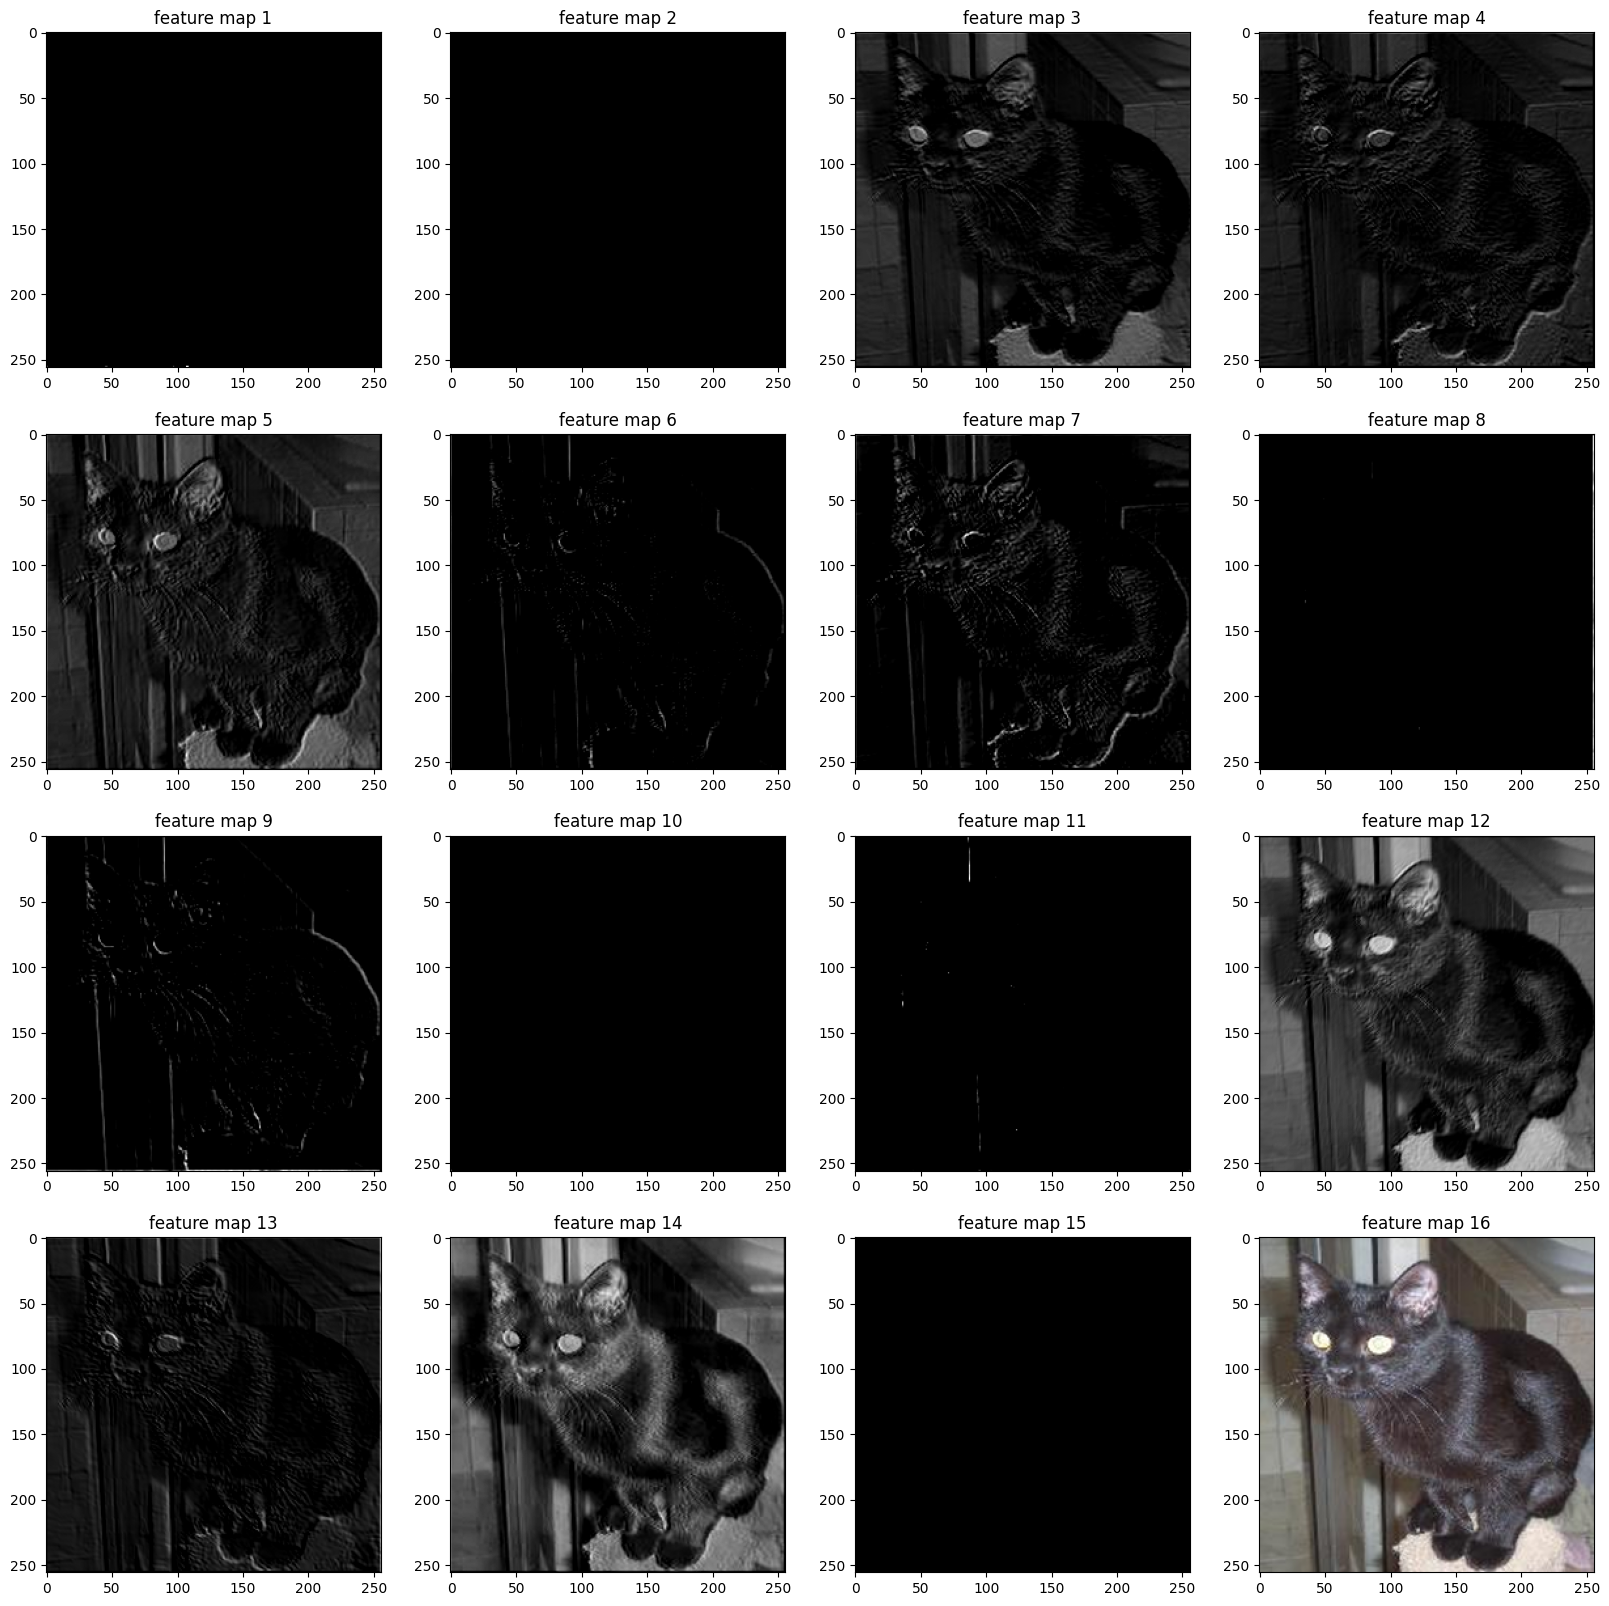

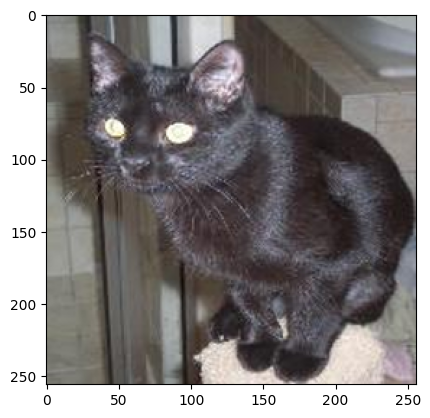

In [13]:
plot_layer('conv2d_59')  #check for layer name with above output

fig=plt.figure()
plt.imshow((img))
plt.show()

In [9]:
img_.shape

(1, 256, 256, 3)